# COVID-19 Data Analysis

This notebook analyzes COVID-19 datasets using NumPy, Pandas, and Matplotlib.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:

day = pd.read_csv("day_wise.csv")
country = pd.read_csv("country_wise_latest.csv")
clean = pd.read_csv("covid_19_clean_complete.csv")

print("Datasets loaded successfully")


Datasets loaded successfully


In [4]:

print("DataFrame Shape:", day.shape)
print("Columns:", day.columns)
print("Missing Values:\n", day.isnull().sum())


DataFrame Shape: (188, 12)
Columns: Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')
Missing Values:
 Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64


In [7]:

confirmed_np = np.array(day['Confirmed'])
deaths_np = np.array(day['Deaths'])

print("Max Confirmed:", np.max(confirmed_np))
print("Mean Deaths:", np.mean(deaths_np))
print("Standard Deviation:", np.std(confirmed_np))


Max Confirmed: 16480485
Mean Deaths: 230770.76063829788
Standard Deviation: 4745317.225790367


In [8]:

country_group = clean.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].max()
top10_confirmed = country_group.sort_values(by='Confirmed', ascending=False).head(10)


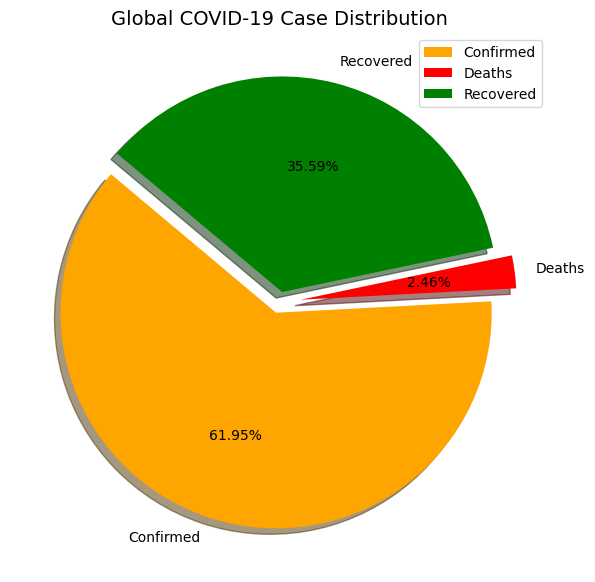

In [8]:
latest = day.iloc[-1]

labels = ['Confirmed', 'Deaths', 'Recovered']
sizes = [latest['Confirmed'], latest['Deaths'], latest['Recovered']]

# Different colors
colors = ['orange', 'red', 'green']

# Slightly separate slices
explode = (0.05, 0.1, 0.05)

plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct='%1.2f%%',
    shadow=True,
    startangle=140
)

plt.title("Global COVID-19 Case Distribution", fontsize=14)

# Add legend
plt.legend(labels, loc="best")

plt.show()


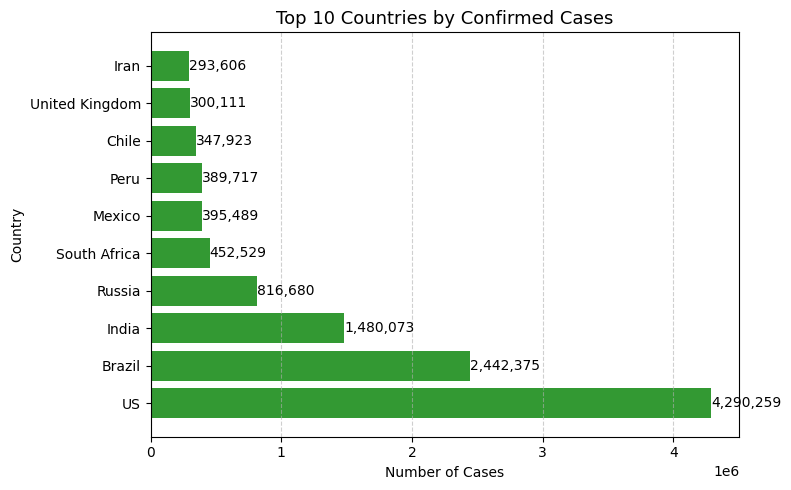

In [ ]:
plt.figure(figsize=(8,5))

colors = plt.cm.rainbow(np.linspace(0, 1, len(top10_confirmed)))

plt.barh(
    top10_confirmed.index,
    top10_confirmed['Confirmed'],
    color=colors
)

plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Country")

plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, value in enumerate(top10_confirmed['Confirmed']):
    plt.text(value, i, f'{value:,}', va='center')

plt.tight_layout()
plt.show()


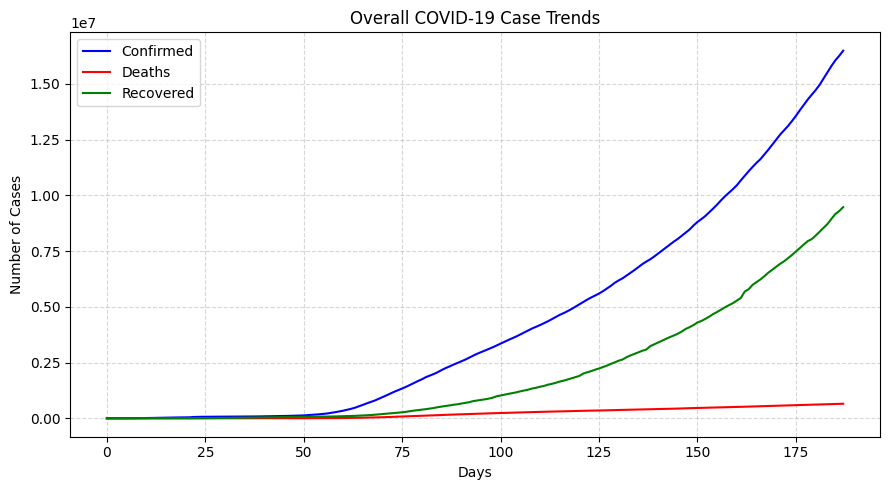

In [9]:
plt.figure(figsize=(9,5))

plt.plot(day['Confirmed'], label='Confirmed', color='blue')
plt.plot(day['Deaths'], label='Deaths', color='red')
plt.plot(day['Recovered'], label='Recovered', color='green')

plt.title("Overall COVID-19 Case Trends")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_34348\190227387.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


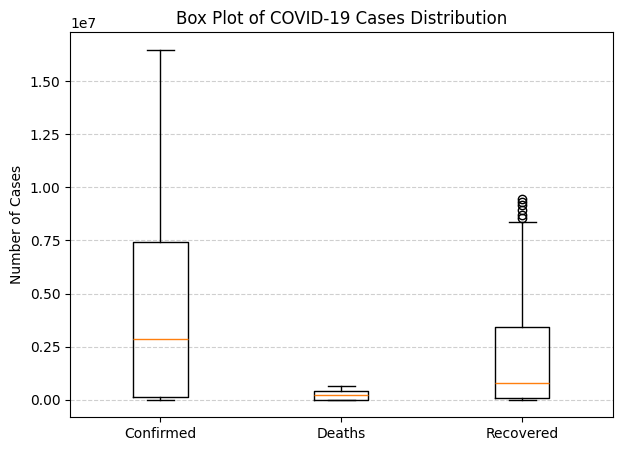

In [10]:
plt.figure(figsize=(7,5))

plt.boxplot(
    [day['Confirmed'], day['Deaths'], day['Recovered']],
    labels=['Confirmed', 'Deaths', 'Recovered']
)

plt.title("Box Plot of COVID-19 Cases Distribution")
plt.ylabel("Number of Cases")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


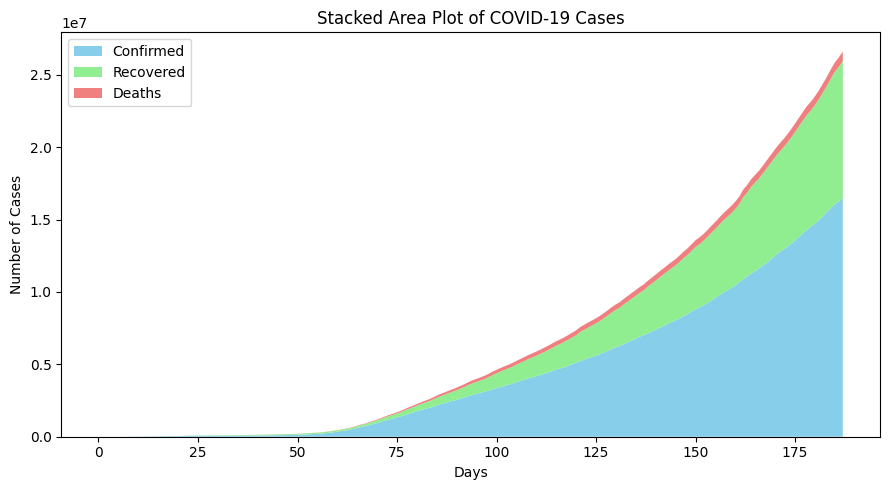

In [11]:
plt.figure(figsize=(9,5))

plt.stackplot(
    day.index,
    day['Confirmed'],
    day['Recovered'],
    day['Deaths'],
    labels=['Confirmed', 'Recovered', 'Deaths'],
    colors=['skyblue', 'lightgreen', 'lightcoral']
)

plt.title("Stacked Area Plot of COVID-19 Cases")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


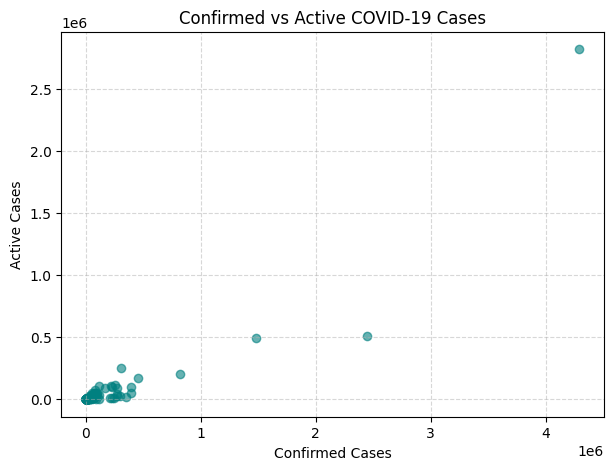

In [12]:
plt.figure(figsize=(7,5))

plt.scatter(
    country['Confirmed'],
    country['Active'],
    alpha=0.6,
    color='teal'
)

plt.title("Confirmed vs Active COVID-19 Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Active Cases")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


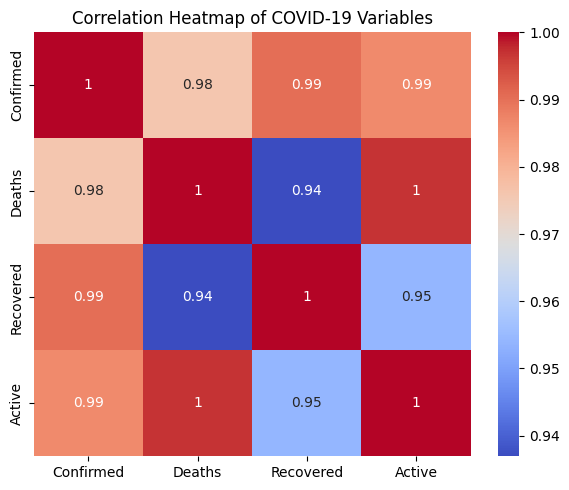

In [15]:
corr = day[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of COVID-19 Variables")
plt.tight_layout()
plt.show()


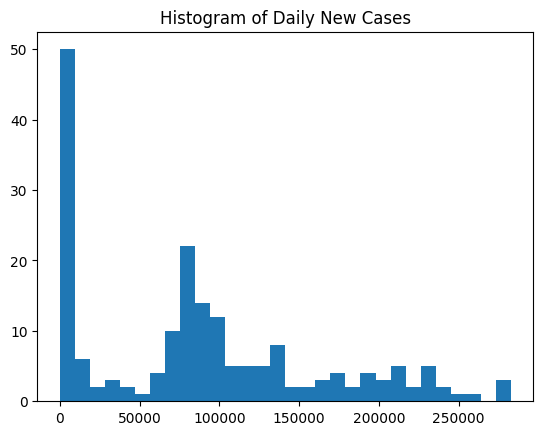

In [18]:

plt.figure()
plt.hist(day['New cases'], bins=30)
plt.title("Histogram of Daily New Cases")
plt.show()


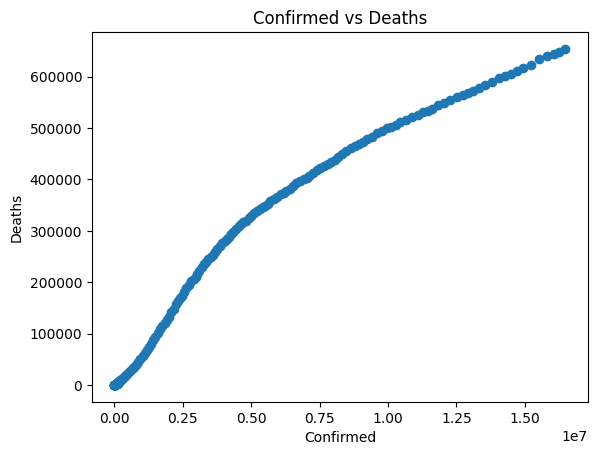

In [17]:

plt.figure()
plt.scatter(day['Confirmed'], day['Deaths'])
plt.title("Confirmed vs Deaths")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()


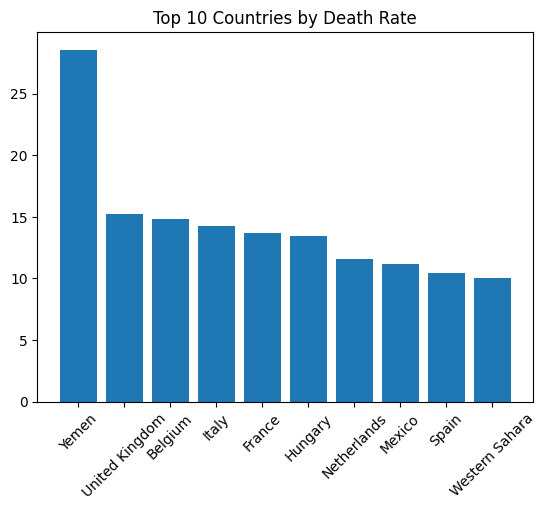

In [16]:

country['Death_Rate'] = (country['Deaths'] / country['Confirmed']) * 100
top_death_rate = country.sort_values(by='Death_Rate', ascending=False).head(10)

plt.figure()
plt.bar(top_death_rate['Country/Region'], top_death_rate['Death_Rate'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Death Rate")
plt.show()
